In [1]:
from utils.get_data import generate_data_nested_dirs, get_cube_at_point
import matplotlib.pylab as plt
import numpy as np
import imageio
from SimpleITK import ReadImage, GetArrayFromImage, sitkFloat32

scans = generate_data_nested_dirs('.')

In [2]:
def plot_one_scan(scan:np.array):
    # plt.figure(figsize=(32,64))
    plt.gray()
    plt.subplots_adjust(0,0,0.5,0.5,0.01,0.01)
    for i in range(scan.shape[0]):
        shape0 = scan.shape[0] // 4 + 1
        plt.subplot(shape0, 4, i + 1)
        plt.imshow(scan[i])
        plt.axis('off')
    plt.show()

In [46]:
def scan_images(scan:np.array):
    # plt.figure(figsize=(32,64))
    plt.gray()
    # plt.subplots_adjust(0,0,0.5,0.5,0.01,0.01)
    for i in range(scan.shape[0]):
        # shape0 = scan.shape[0] // 4 + 1
        # plt.subplot(shape0, 4, i + 1)
        plt.imshow(scan[i])
        plt.axis('off')
        plt.savefig(f'scan_image_{i}', bbox_inches='tight', pad_inches=0, transparent=True)

In [3]:
import pandas as pd

df_annotations = pd.read_csv('CSVFILES/annotations.csv')
df_annotations

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203


In [26]:
scan = next(scans)

In [27]:
array, zxy_spacing, zxy_origin, filename = scan
print(zxy_spacing, zxy_origin, filename, sep='\n')

df_test = df_annotations.loc[df_annotations.seriesuid == filename]
df_test

(2.5, 0.859375, 0.859375)
(-394.5, -199.3, -220.0)
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249


,seriesuid,coordX,coordY,coordZ,diameter_mm
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.82526,-91.247251,21.089619


In [28]:
df_test['array'] = df_test.apply(lambda row: get_cube_at_point(array,zxy_spacing,(row['coordZ']-zxy_origin[0],row['coordX']-zxy_origin[1],row['coordY']-zxy_origin[2]),row['diameter_mm']), axis=1)
df_test['array']

8    [[[-916.0, -912.0, -918.0, -911.0, -895.0, -90...
Name: array, dtype: object

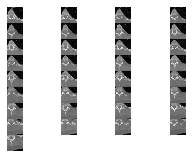

8    None
Name: array, dtype: object

In [29]:
df_test['array'].apply(plot_one_scan)

In [30]:
df_test['array'].apply(lambda x: print(x.shape))

(33, 99, 99)


8    None
Name: array, dtype: object

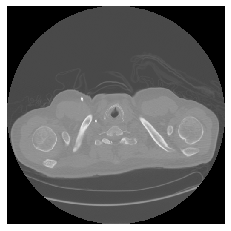

In [47]:
scan_images(array)